# 1. Introduction

## 1.1. Overview

Graphs are used to model relationships between objects. NetworkX is a Python library that allows for the creation, manipulation, and analysis of these graphs.


## 1.2. Objectives

- Introduce basic graph theory concepts.
- Demonstrate how to use NetworkX for graph creation and visualization.
- Explore key graph algorithms.
- Apply these concepts to real-world examples.

# 2. Installing NetworkX

## 2.1. Installation via pip

To install NetworkX, you can use `pip`, which is the Python package installer. Run the following command in a code cell:

python
`!pip install networkx`

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

print("NetworkX version:", nx.__version__)

NetworkX version: 3.2.1


## 2.2. Verifying the Installation

To ensure that NetworkX is installed correctly, you can import it and check its version. Run the following code in a new cell:

# 3. Basics of Graph Theory

## 3.1. Graph Definitions

### 3.1.1. Nodes and Edges

A graph consists of nodes (also called vertices) and edges (also called links or connections). Nodes represent entities, and edges represent the relationships between these entities.


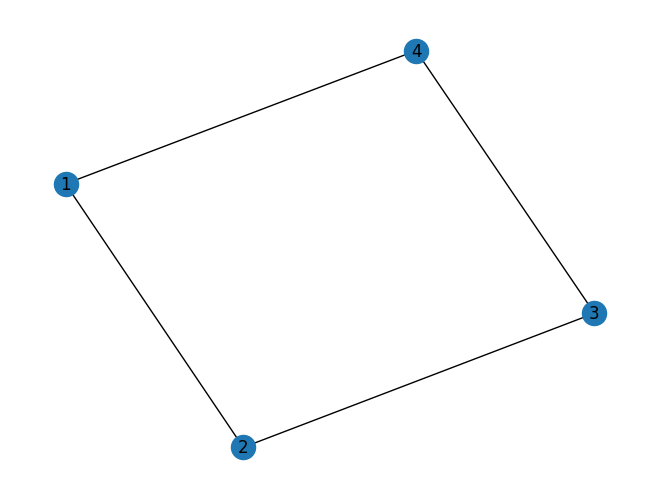

In [2]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3, 4])

# Add edges
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (3, 4), (4, 1)])

# Draw the graph
nx.draw(G, with_labels=True)
# plt.show()

### 3.1.2. Types of Graphs (Undirected, Directed, Weighted, etc.)

- Undirected Graph: Edges have no direction.
- Directed Graph (DiGraph): Edges have a direction, going from one node to another.
- Weighted Graph: Edges have weights, representing the cost or distance between nodes.

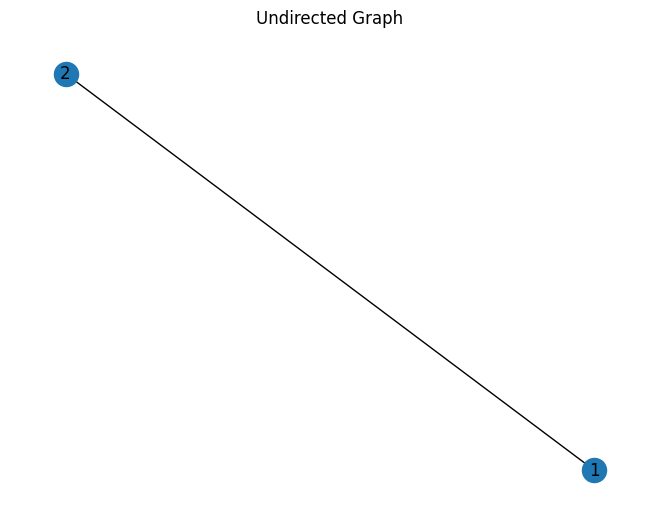

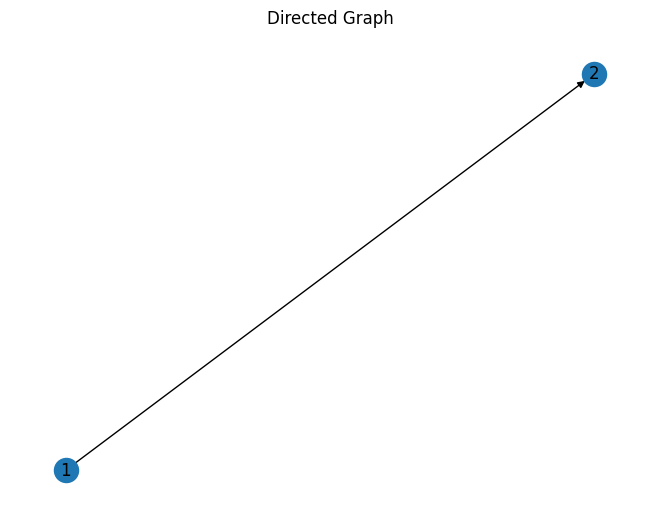

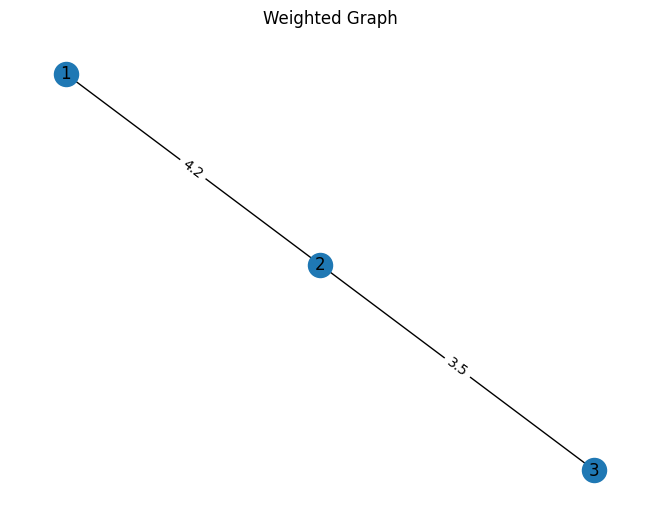

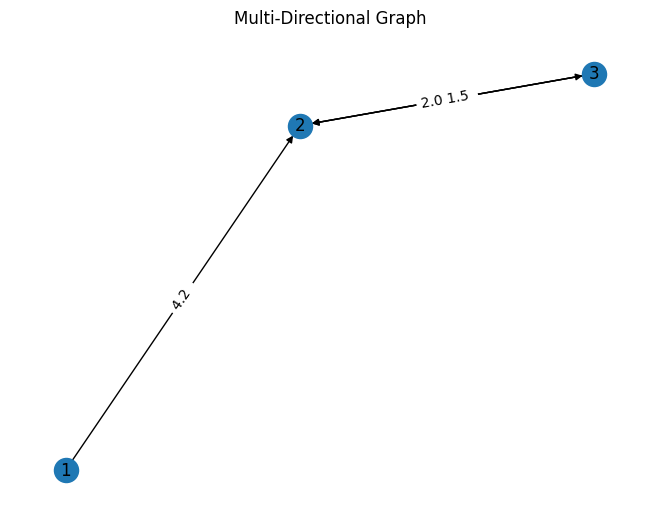

In [3]:
# Undirected graph
G_undirected = nx.Graph()
G_undirected.add_edge(1, 2)
nx.draw(G_undirected, with_labels=True)
plt.title("Undirected Graph")
plt.show()

# Directed graph
G_directed = nx.DiGraph()
G_directed.add_edge(1, 2)
nx.draw(G_directed, with_labels=True, arrows=True)
plt.title("Directed Graph")
plt.show()

# Weighted graph
G_weighted = nx.Graph()
G_weighted.add_edge(1, 2, weight=4.2)
G_weighted.add_edge(2, 3, weight=3.5)
pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True)
labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)
plt.title("Weighted Graph")
plt.show()

# Create Multi-DiGraph
G_multiDi = nx.MultiDiGraph()
G_multiDi.add_edge(1, 2, weight=4.2)
G_multiDi.add_edge(2, 3, weight=3.5)
G_multiDi.add_edge(3, 2, weight=2.0)
G_multiDi.add_edge(3, 2, weight=1.5)  # Adding another edge between 3 and 2

pos = nx.spring_layout(G_multiDi)
nx.draw(G_multiDi, pos, with_labels=True)

# Manually create labels for each edge considering multi-edges
edge_labels = {}
for u, v, key, data in G_multiDi.edges(data=True, keys=True):
    edge_labels[(u, v)] = edge_labels.get((u, v), "") + f"{data['weight']} "

# Draw edge labels
nx.draw_networkx_edge_labels(G_multiDi, pos, edge_labels=edge_labels)

plt.title("Multi-Directional Graph")
plt.show()



## 3.2. Basic Graph Properties


### 3.2.1. Degree

The degree of a node is the number of edges connected to it. In a directed graph, we have in-degree and out-degree.

In [4]:
# Degree of nodes
print("Degree of node 1:", G.degree[1])

# For a directed graph
G_directed.add_edge(2, 1)
print("Out-degree of node 1:", G_directed.out_degree[1])
print("In-degree of node 1:", G_directed.in_degree[1])


Degree of node 1: 2
Out-degree of node 1: 1
In-degree of node 1: 1


### 3.2.2. Path

A path is a sequence of nodes connected by edges. The shortest path between two nodes can be found using algorithms like Dijkstra's or Bellman-Ford.

In [5]:
# Shortest path in an undirected graph
path = nx.shortest_path(G, source=1, target=3)
print("Shortest path between node 1 and node 3:", path)


Shortest path between node 1 and node 3: [1, 2, 3]


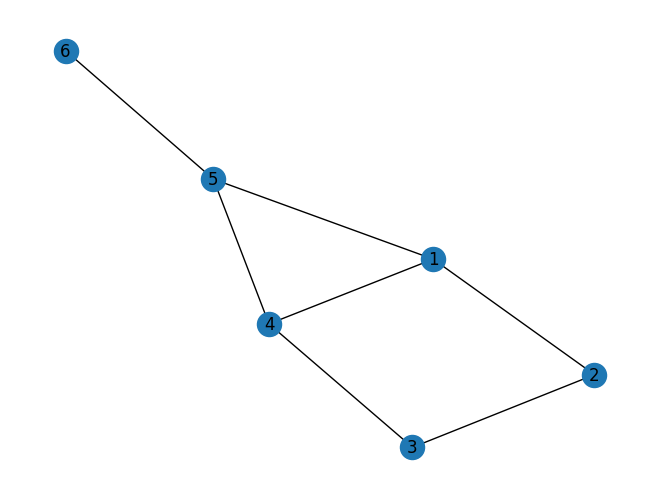

In [6]:
G.add_edges_from([(4, 5), (1, 5), (5, 6)])
nx.draw(G, with_labels=True)

In [7]:
path = nx.shortest_path(G, source=1, target=6)
print("Shortest path between node 1 and node 3:", path)

Shortest path between node 1 and node 3: [1, 5, 6]


### 3.2.3. Connected Components

A connected component is a subset of nodes such that there is a path between any two nodes in this subset.

In [8]:
# Finding connected components in an undirected graph
components = list(nx.connected_components(G))
print("Connected components:", components)

# For a directed graph (weakly connected components)
weakly_components = list(nx.weakly_connected_components(G_directed))
print("Weakly connected components in directed graph:", weakly_components)


Connected components: [{1, 2, 3, 4, 5, 6}]
Weakly connected components in directed graph: [{1, 2}]


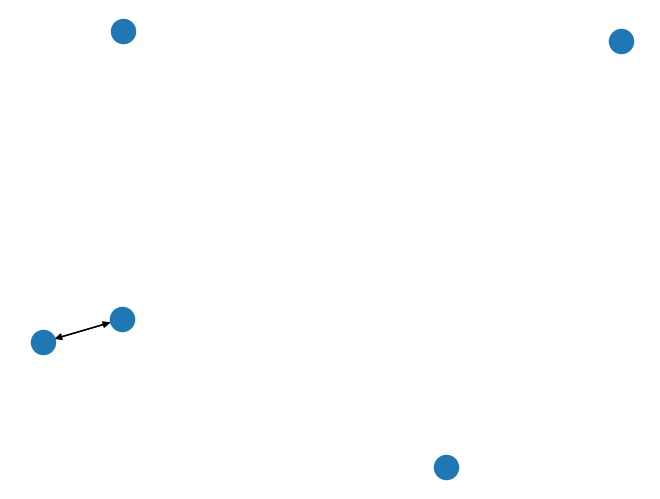

In [9]:
G_directed.add_nodes_from([3, 4, 5])
nx.draw(G_directed)

In [10]:
# For a directed graph (weakly connected components)
weakly_components = list(nx.weakly_connected_components(G_directed))
print("Weakly connected components in directed graph:", weakly_components)

Weakly connected components in directed graph: [{1, 2}, {3}, {4}, {5}]


# 4. Creating and Visualizing Graphs with NetworkX

## 4.1. Creating Graphs

### 4.1.1. Creating an Empty Graph
To create an empty graph, you can use `nx.Graph()` for undirected graphs or `nx.DiGraph()` for directed graphs or `nx.MultiDiGraph` for multi directed graph.


In [11]:
# Create an empty undirected graph
G = nx.Graph()
print("Empty graph created:", G)

Empty graph created: Graph with 0 nodes and 0 edges


In [12]:
# Adding nodes
G.add_node(1)
G.add_nodes_from([2, 3])

# Adding edges
G.add_edge(1, 2)
G.add_edges_from([(2, 3)])

# Display nodes and edges
print("Nodes in the graph:", G.nodes())
print("Edges in the graph:", G.edges())


Nodes in the graph: [1, 2, 3]
Edges in the graph: [(1, 2), (2, 3)]


## 4.2. Visualizing Graphs

### 4.2.1. Using Matplotlib for Visualization

Matplotlib can be used to draw and visualize graphs created with NetworkX

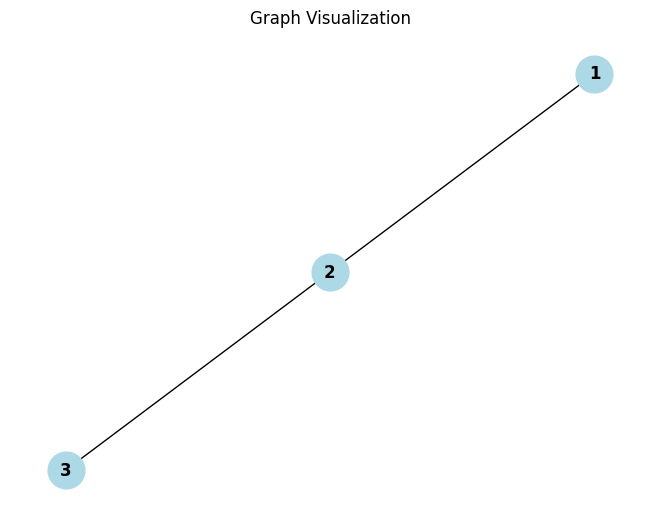

In [13]:
# import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_weight="bold")
plt.title("Graph Visualization")
plt.show()

### 4.2.2. Layout Algorithms (Spring, Circular, etc.)

NetworkX provides several layout algorithms to position nodes in different ways.

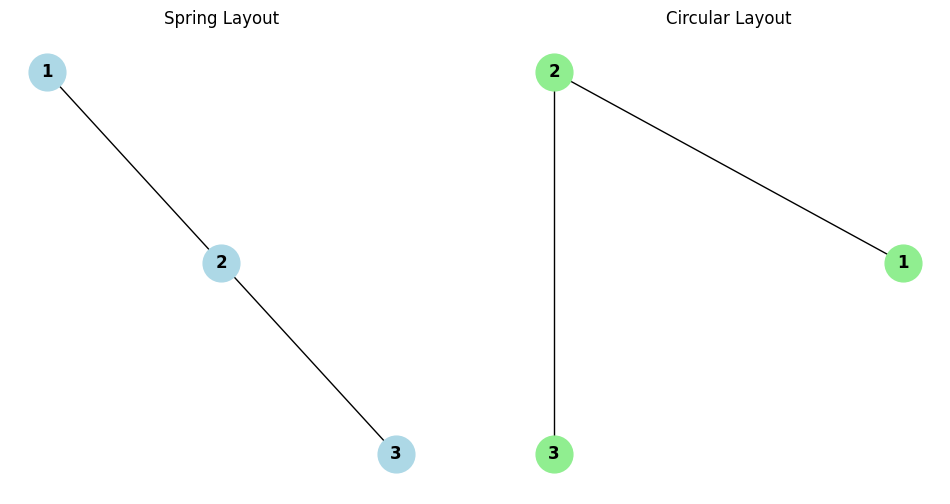

In [14]:
# Using different layout algorithms

# Spring layout
pos_spring = nx.spring_layout(G)
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(G, pos_spring, with_labels=True, node_size=700, node_color="lightblue", font_weight="bold")
plt.title("Spring Layout")

# Circular layout
pos_circular = nx.circular_layout(G)
plt.subplot(122)
nx.draw(G, pos_circular, with_labels=True, node_size=700, node_color="lightgreen", font_weight="bold")
plt.title("Circular Layout")

plt.show()


## 4.3. Additional Graph Operations

### 4.3.1. Converting Graphs to and from JSON

You can convert a graph to JSON format and back using `json_graph` from `networkx.readwrite`

JSON representation of the graph:
{
  "directed": false,
  "multigraph": false,
  "graph": {},
  "nodes": [
    {
      "id": 1
    },
    {
      "id": 2
    },
    {
      "id": 3
    }
  ],
  "links": [
    {
      "source": 1,
      "target": 2
    },
    {
      "source": 2,
      "target": 3
    }
  ]
}
Converted graph:
[1, 2, 3]


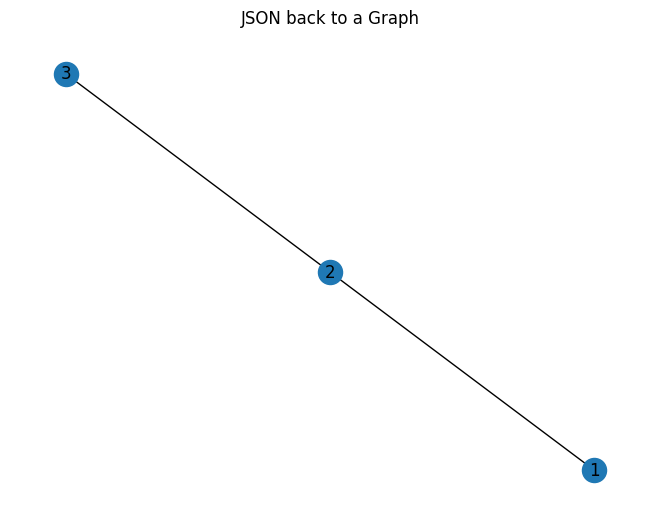

In [15]:
from networkx.readwrite import json_graph
import json

# Convert graph to JSON
json_data = json_graph.node_link_data(G)
print("JSON representation of the graph:")
print(json.dumps(json_data, indent=2))

# Convert JSON back to a graph
json_data_to_graph = json_graph.node_link_graph(json_data)
print("Converted graph:")
print(json_data_to_graph.nodes())

nx.draw(json_data_to_graph, with_labels=True)
plt.title("JSON back to a Graph")
plt.show()

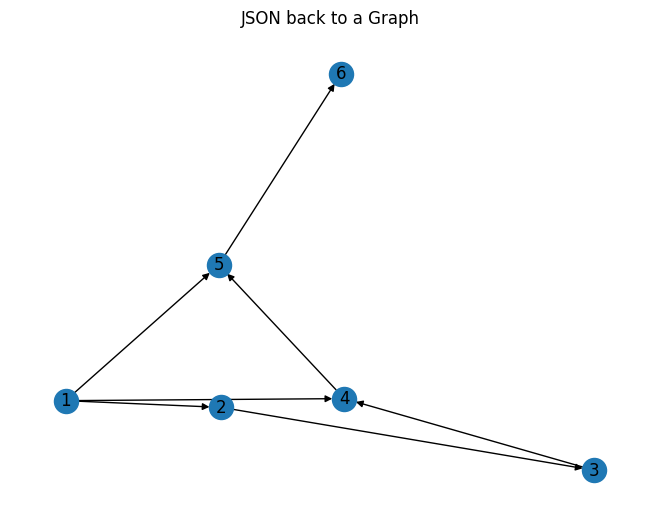

In [16]:
json_data = {'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 4},
  {'source': 1, 'target': 5},
  {'source': 2, 'target': 3},
  {'source': 3, 'target': 4},
  {'source': 4, 'target': 5},
  {'source': 5, 'target': 6}]}

json_data_to_graph = json_graph.node_link_graph(json_data)
nx.draw(json_data_to_graph, with_labels=True)
plt.title("JSON back to a Graph")
plt.show()

# 5. Graph Algorithms

## 5.1. Traversal Algorithms

### 5.1.1. Depth-First Search (DFS)

Depth-First Search explores as far as possible along each branch before backtracking. You can use NetworkX's `dfs_edges()` to perform DFS.


DFS edges starting from node 1: [(1, 2), (2, 4), (2, 5), (1, 3), (3, 6), (3, 7)]


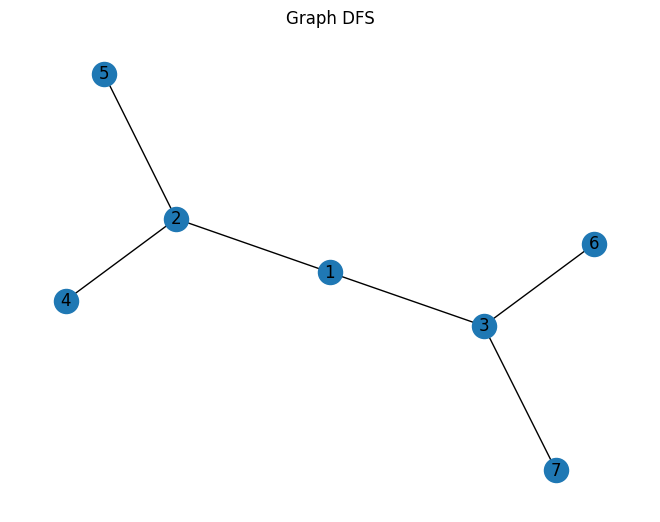

In [17]:
# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])

# Perform Depth-First Search
dfs_edges = list(nx.dfs_edges(G, source=1))
print("DFS edges starting from node 1:", dfs_edges)

nx.draw(G, with_labels=True)
plt.title("Graph DFS")
plt.show()

### 5.1.2. Breadth-First Search (BFS)

Breadth-First Search explores all neighbors at the present depth level before moving on to nodes at the next depth level. Use bfs_edges() to perform BFS.

BFS edges starting from node 1: [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)]


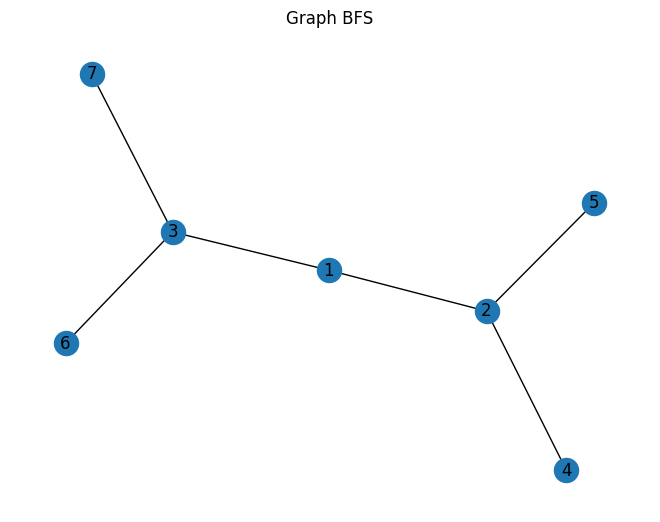

In [18]:
# Perform Breadth-First Search
bfs_edges = list(nx.bfs_edges(G, source=1))
print("BFS edges starting from node 1:", bfs_edges)

nx.draw(G, with_labels=True)
plt.title("Graph BFS")
plt.show()

## 5.2. Shortest Path Algorithms

### 5.2.1. Dijkstra's Algorithm

Dijkstra's Algorithm finds the shortest path between nodes in a graph with non-negative edge weights.

Shortest path from node 1 to node 4: [1, 2, 4]


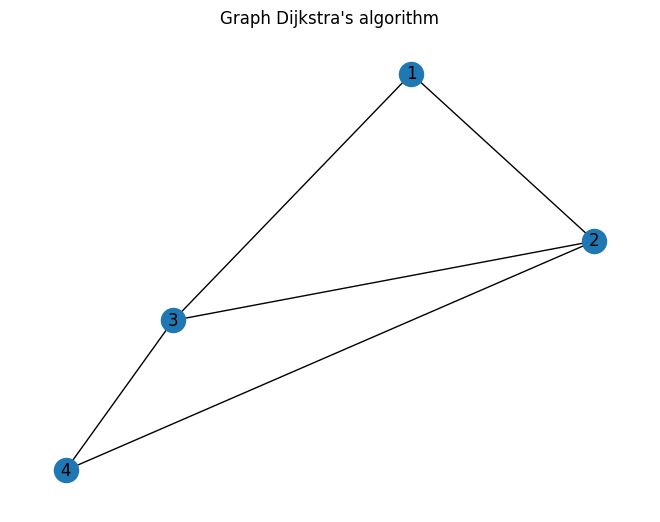

In [19]:
# Create a weighted graph
G_weighted = nx.Graph()
G_weighted.add_weighted_edges_from([(1, 2, 4), (1, 3, 2), (2, 3, 5), (2, 4, 1), (3, 4, 8)])

# Find the shortest path using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(G_weighted, source=1, target=4)
print("Shortest path from node 1 to node 4:", shortest_path)

nx.draw(G_weighted, with_labels=True)
plt.title("Graph Dijkstra's algorithm")
plt.show()


### 5.2.2. Bellman-Ford Algorithm

The Bellman-Ford Algorithm finds the shortest path in a graph that may have negative weight edges. It can also detect negative weight cycles.

Shortest path from node 1 to node 4 using Bellman-Ford: [1, 3, 2, 4]


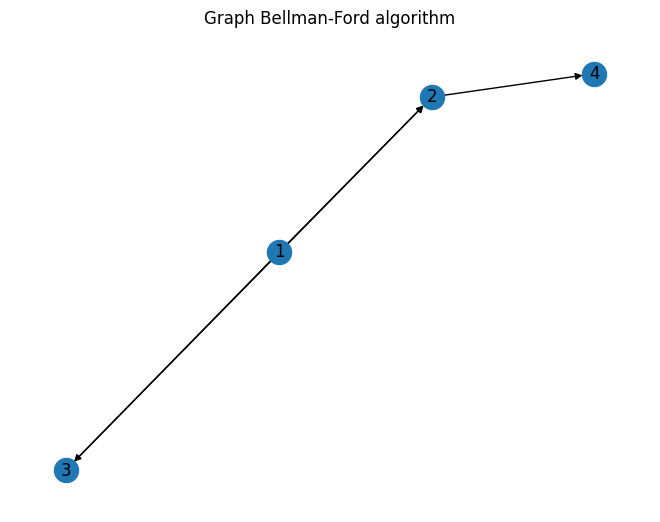

In [20]:
# Create a graph with negative weights
G_neg = nx.DiGraph()
G_neg.add_weighted_edges_from([(1, 2, 4), (1, 3, 2), (3, 2, -1), (2, 4, 1)])

# Find the shortest path using Bellman-Ford algorithm
bellman_ford_path = nx.bellman_ford_path(G_neg, source=1, target=4)
print("Shortest path from node 1 to node 4 using Bellman-Ford:", bellman_ford_path)

nx.draw(G_neg, with_labels=True)
plt.title("Graph Bellman-Ford algorithm")
plt.show()


## 5.3. Centrality Measures

### 5.3.1. Degree Centrality

Degree Centrality measures the number of connections a node has.

Degree Centrality: {1: 0.3333333333333333, 2: 0.5, 3: 0.5, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666, 7: 0.16666666666666666}


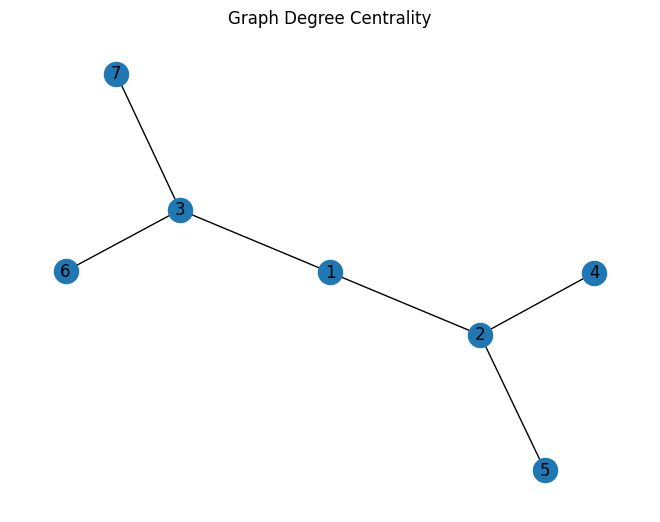

In [21]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

nx.draw(G, with_labels=True)
plt.title("Graph Degree Centrality")
plt.show()

### 5.3.2. Betweenness Centrality

Betweenness Centrality measures how often a node lies on the shortest path between other nodes.

Betweenness Centrality: {1: 0.6, 2: 0.6, 3: 0.6, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}


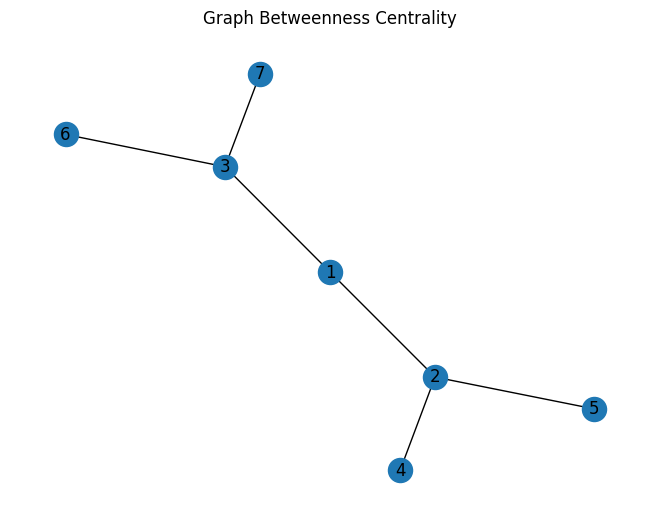

In [22]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)

nx.draw(G, with_labels=True)
plt.title("Graph Betweenness Centrality")
plt.show()

### 5.3.3. Closeness Centrality

Closeness Centrality measures how close a node is to all other nodes in the graph.

Closeness Centrality: {1: 0.6, 2: 0.5454545454545454, 3: 0.5454545454545454, 4: 0.375, 5: 0.375, 6: 0.375, 7: 0.375}


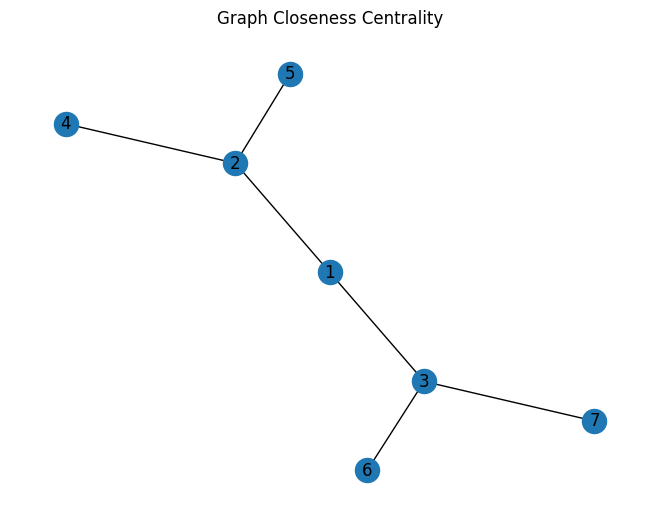

In [23]:
# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness_centrality)

nx.draw(G, with_labels=True)
plt.title("Graph Closeness Centrality")
plt.show()

## 5.4. Additional Graph Properties and Functions

### 5.4.1. Graph Properties

In [24]:
# Check if the graph is directed or multigraph
print("Is directed:", G.is_directed())
print("Is multigraph:", G.is_multigraph())

# Order of the graph
print("Order of the graph:", G.order())

Is directed: False
Is multigraph: False
Order of the graph: 7


#### 5.4.1.1 Density

In [25]:
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
from networkx.classes.function import density
density(G)

0.2857142857142857

#### 5.4.1.2 Degree

In [26]:
#https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html
from networkx.classes.function import degree
degree(G, nbunch=None, weight=None)

DegreeView({1: 2, 2: 3, 3: 3, 4: 1, 5: 1, 6: 1, 7: 1})

#### 5.4.1.3 Degree Histogram

In [27]:
from networkx.classes.function import degree_histogram
degree_histogram(G)

[0, 4, 1, 2]

#### 5.4.1.4 Neighbours

In [28]:
for x in G.nodes:
    print('Neighbors for ' + str(x) + ':')
    print([n for n in G.neighbors(x)])

Neighbors for 1:
[2, 3]
Neighbors for 2:
[1, 4, 5]
Neighbors for 3:
[1, 6, 7]
Neighbors for 4:
[2]
Neighbors for 5:
[2]
Neighbors for 6:
[3]
Neighbors for 7:
[3]


#### 5.4.1.5 Adjacency matrix

In [29]:
import warnings
warnings.filterwarnings("ignore")

# Get adjacency matrix
A = nx.adjacency_matrix(G)
print("Adjacency matrix:")
print(A.todense())

# Modify diagonal elements
A.setdiag(A.diagonal() - 1)
print("Modified adjacency matrix:")
print(A.todense())

Adjacency matrix:
[[0 1 1 0 0 0 0]
 [1 0 0 1 1 0 0]
 [1 0 0 0 0 1 1]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
Modified adjacency matrix:
[[-1  1  1  0  0  0  0]
 [ 1 -1  0  1  1  0  0]
 [ 1  0 -1  0  0  1  1]
 [ 0  1  0 -1  0  0  0]
 [ 0  1  0  0 -1  0  0]
 [ 0  0  1  0  0 -1  0]
 [ 0  0  1  0  0  0 -1]]


[(0, 1, 0), (1, 0, 0), (2, 2, 0), (2, 2, 1)]
[0, 1, 2]


array([[0., 2., 0.],
       [1., 0., 0.],
       [0., 0., 5.]])

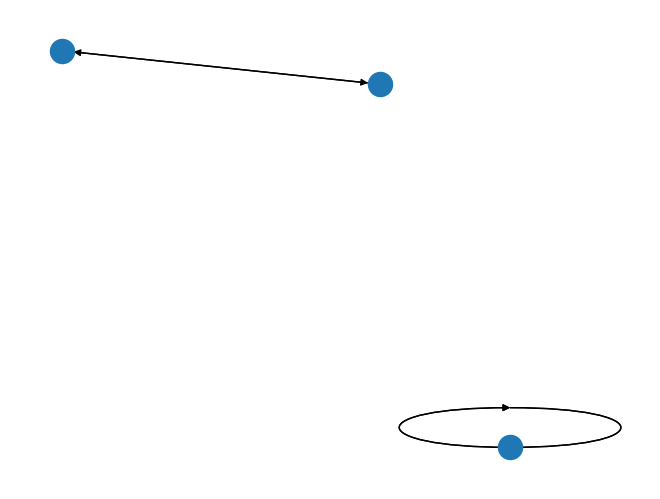

In [30]:
G = nx.MultiDiGraph()
G.add_edge(0, 1, weight=2)
G.add_edge(1, 0)
G.add_edge(2, 2, weight=3)
G.add_edge(2, 2, weight=2)
nx.draw(G)
print(G.edges)
print(G.nodes)
nx.to_numpy_array(G, nodelist=[0, 1, 2])

In [31]:
df = nx.to_pandas_edgelist(json_data_to_graph)
df

,source,target
0,1,2
1,1,4
2,1,5
3,2,3
4,3,4
5,4,5
6,5,6


[('A', 'B'), ('A', 'C'), ('A', 'E'), ('C', 'E')]
['A', 'B', 'C', 'E']
--------------------


,source,target,weight,cost,strength
0,A,B,7,1,5
1,A,C,5,3,3
2,A,E,4,7,8
3,C,E,10,9,2


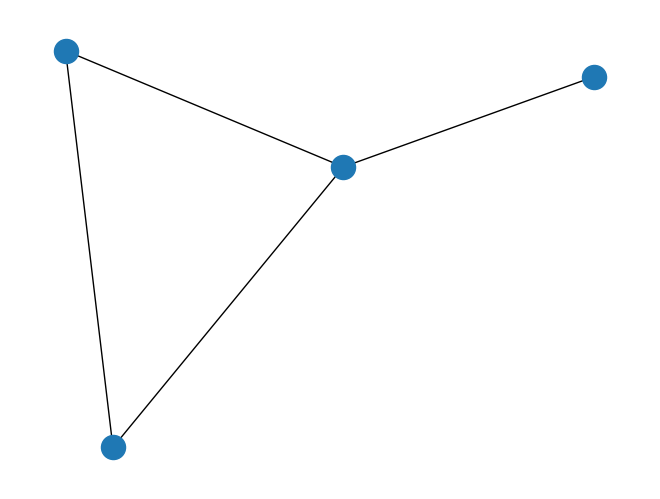

In [32]:
G = nx.Graph(
    [
        ("A", "B", {"cost": 1, "weight": 7, "strength": 5}),
        ("C", "E", {"cost": 9, "weight": 10, "strength": 2}),
        ("A", "C", {"cost": 3, "weight": 5, "strength": 3}),
        ("A", "E", {"cost": 7, "weight": 4, "strength": 8}),
    ]
)
nx.draw(G)
print(G.edges)
print(G.nodes)
print("--------------------")
df = nx.to_pandas_edgelist(G)
df

[('A', 'B'), ('A', 'C'), ('A', 'E'), ('C', 'E')]
['A', 'B', 'C', 'E']
--------------------


,source,target,weight,cost,strength
0,A,B,7,1,5
1,A,C,5,3,3
2,A,E,4,7,8
3,C,E,10,9,2


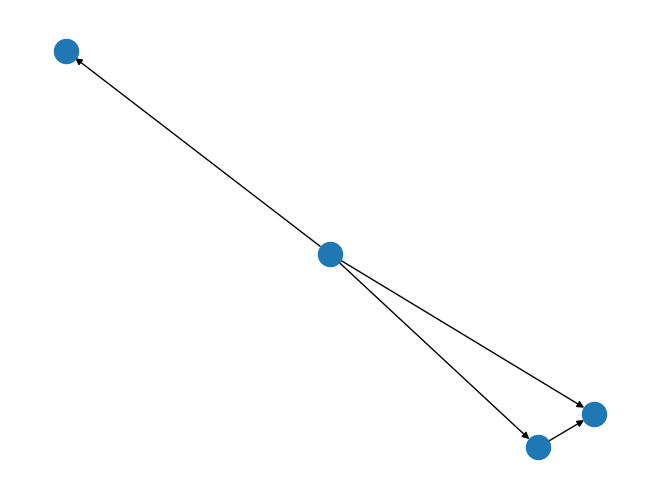

In [33]:
G = nx.DiGraph(
    [
        ("A", "B", {"cost": 1, "weight": 7, "strength": 5}),
        ("C", "E", {"cost": 9, "weight": 10, "strength": 2}),
        ("A", "C", {"cost": 3, "weight": 5, "strength": 3}),
        ("A", "E", {"cost": 7, "weight": 4, "strength": 8}),
    ]
)
nx.draw(G)
print(G.edges)
print(G.nodes)
print("--------------------")
df = nx.to_pandas_edgelist(G)
df

In [34]:
df = nx.to_pandas_edgelist(G, nodelist=["B", "E"])
df

,source,target


In [35]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[ 0  7  5  4]
 [ 0  0  0  0]
 [ 0  0  0 10]
 [ 0  0  0  0]]


In [36]:
df = nx.to_pandas_edgelist(G, nodelist=['A', 'C'], edge_key='strength')
print(df)
df = nx.to_pandas_edgelist(G, nodelist=['A', 'C'])
print(df)
df = nx.to_pandas_edgelist(G, nodelist=['A', 'C'], edge_key='ekey')
print(df)
# print(df[['source', 'target', 'cost', 'strength']])

  source target  weight  cost  strength
0      A      B       7     1         5
1      A      C       5     3         3
2      A      E       4     7         8
3      C      E      10     9         2
  source target  weight  cost  strength
0      A      B       7     1         5
1      A      C       5     3         3
2      A      E       4     7         8
3      C      E      10     9         2
  source target  weight  cost  strength
0      A      B       7     1         5
1      A      C       5     3         3
2      A      E       4     7         8
3      C      E      10     9         2


  source target  key  weight  cost  strength
0      A      B    0       7     1         5
1      A      B    1       6     2         4
2      A      C    0       5     3         3
3      A      E    0       4     7         8
4      C      E    0      10     9         2


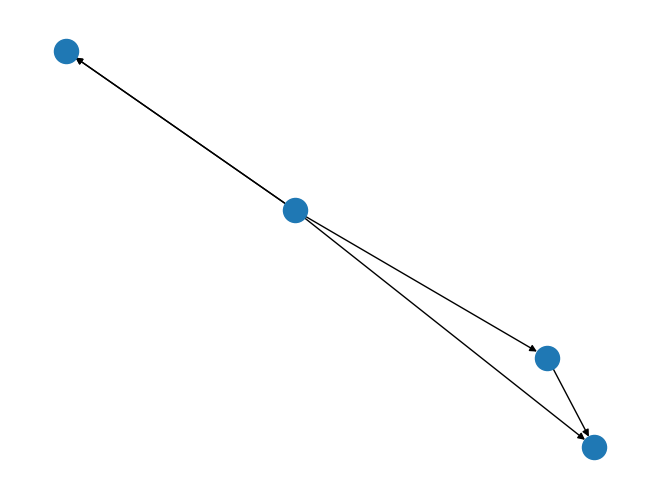

In [37]:
# Creating a MultiDiGraph with multiple edges between the same nodes
G = nx.MultiDiGraph()
G.add_edge("A", "B", key=0, cost=1, weight=7, strength=5)
G.add_edge("A", "B", key=1, cost=2, weight=6, strength=4)
G.add_edge("C", "E", key=0, cost=9, weight=10, strength=2)
G.add_edge("A", "C", key=0, cost=3, weight=5, strength=3)
G.add_edge("A", "E", key=0, cost=7, weight=4, strength=8)
nx.draw(G)

# Converting the MultiDiGraph to a pandas DataFrame
df = nx.to_pandas_edgelist(G, edge_key='key')
print(df)



  source target  key  weight  cost  strength
0      A      B    0       7     1         5
1      A      B    1       6     2         4
2      A      C    0       5     3         3
3      A      E    0       4     7         8
4      C      E    0      10     9         2


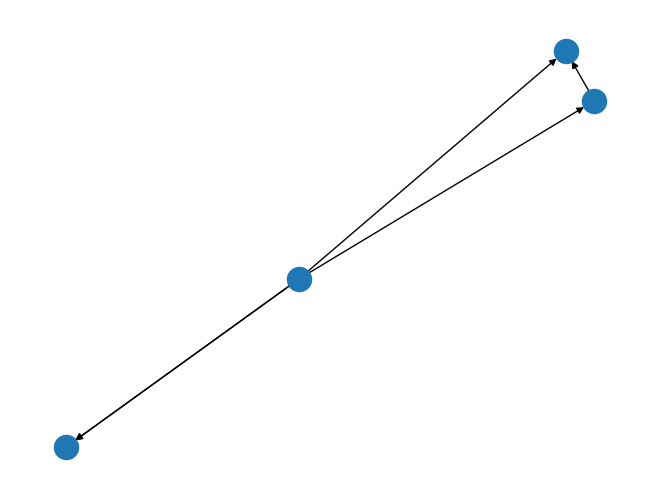

In [38]:
# Creating a MultiDiGraph with multiple edges between the same nodes
G = nx.MultiDiGraph()
G.add_edge("A", "B", cost=1, weight=7, strength=5)
G.add_edge("A", "B", cost=2, weight=6, strength=4)
G.add_edge("C", "E", cost=9, weight=10, strength=2)
G.add_edge("A", "C", cost=3, weight=5, strength=3)
G.add_edge("A", "E", cost=7, weight=4, strength=8)
nx.draw(G)

# Converting the MultiDiGraph to a pandas DataFrame
df = nx.to_pandas_edgelist(G, edge_key='key')
print(df)


# **Sudoku Graph**
- https://networkx.org/documentation/stable/reference/generated/networkx.generators.sudoku.sudoku_graph.html

81
810
--------------------
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


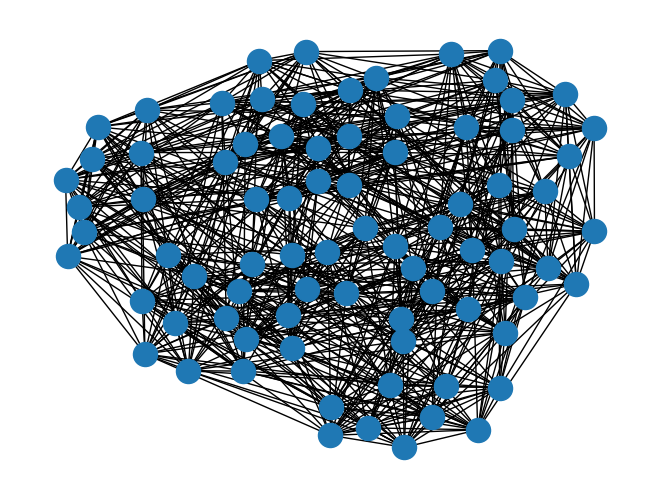

In [39]:
# default is 3x3 = 9 nodes
G = nx.sudoku_graph()
print(G.number_of_nodes())
print(G.number_of_edges())
print("--------------------")
A = nx.adjacency_matrix(G)
print(A.todense())
nx.draw(G)

16
56
--------------------
[[0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0]
 [1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0]
 [1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1]
 [1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0]
 [1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1]
 [0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1]
 [0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1]
 [0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1]
 [0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0]]


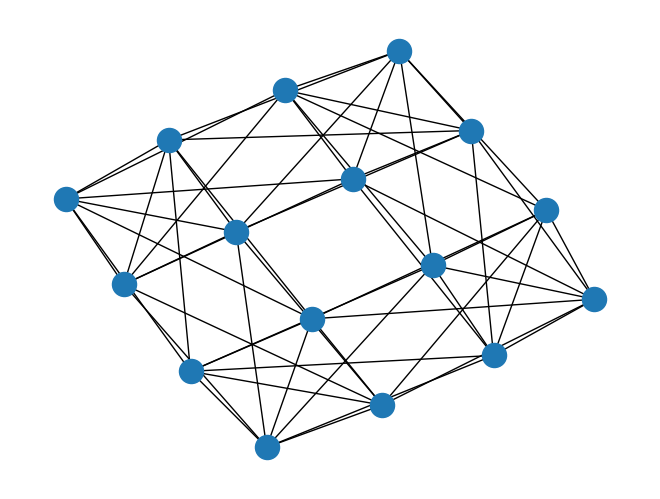

In [40]:
# default is 3x3 = 9 nodes
G = nx.sudoku_graph(n=2)
print(G.number_of_nodes())
print(G.number_of_edges())
print("--------------------")
A = nx.adjacency_matrix(G)
print(A.todense())
nx.draw(G)

# **Grid Graph**

  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (1, 0)	1
  (1, 3)	1
  (1, 7)	1
  (2, 0)	1
  (2, 3)	1
  (2, 4)	1
  (2, 8)	1
  (3, 1)	1
  (3, 2)	1
  (3, 5)	1
  (3, 9)	1
  (4, 2)	1
  (4, 5)	1
  (4, 10)	1
  (5, 3)	1
  (5, 4)	1
  (5, 11)	1
  (6, 0)	1
  (6, 7)	1
  (6, 8)	1
  (6, 12)	1
  (7, 1)	1
  :	:
  (16, 22)	1
  (17, 11)	1
  (17, 15)	1
  (17, 16)	1
  (17, 23)	1
  (18, 12)	1
  (18, 19)	1
  (18, 20)	1
  (19, 13)	1
  (19, 18)	1
  (19, 21)	1
  (20, 14)	1
  (20, 18)	1
  (20, 21)	1
  (20, 22)	1
  (21, 15)	1
  (21, 19)	1
  (21, 20)	1
  (21, 23)	1
  (22, 16)	1
  (22, 20)	1
  (22, 23)	1
  (23, 17)	1
  (23, 21)	1
  (23, 22)	1


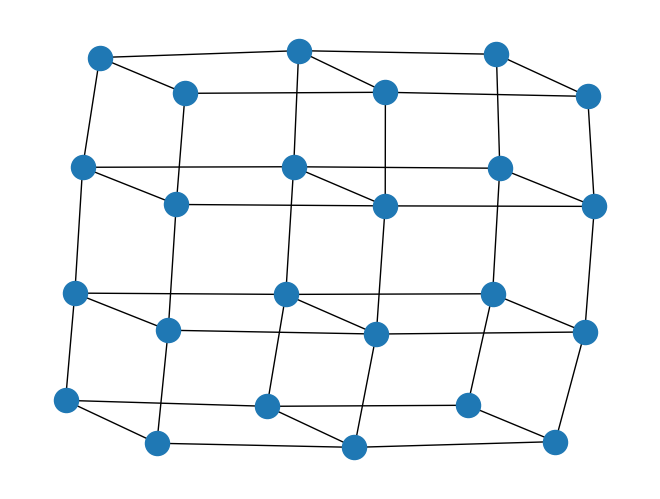

In [41]:
G = nx.grid_graph(dim=(2, 3, 4))
nx.draw(G)
A = nx.adjacency_matrix(G)
print(A)

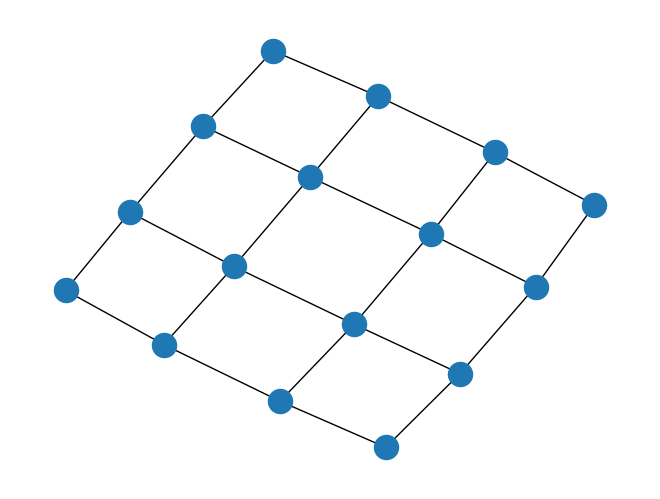

In [42]:
G = nx.grid_graph([4,4])
nx.draw(G)

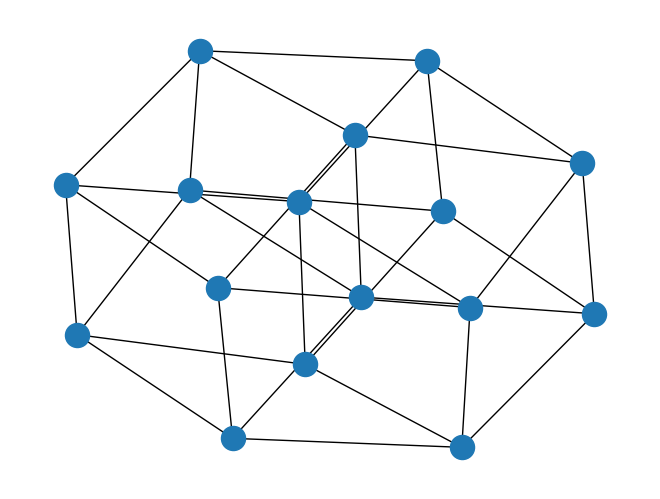

In [43]:
G = nx.grid_graph([2,2,2,2])
nx.draw(G)

# **Binomial graph**

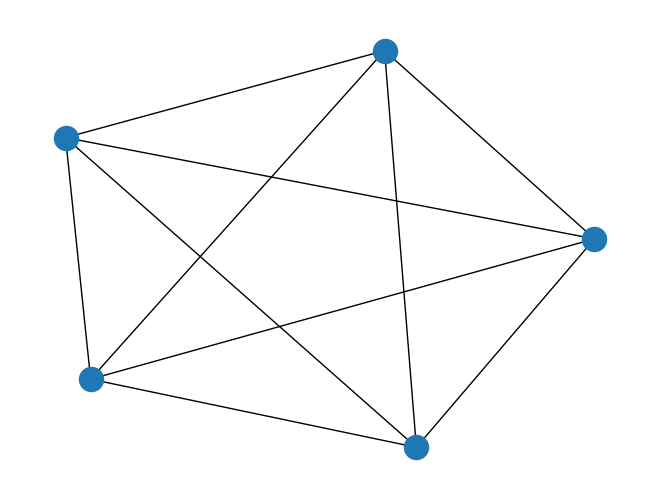

In [44]:
G = nx.binomial_graph(5, 1, seed=None, directed=False)
nx.draw(G)